## The Hodgkin-Huxley model
The electric potential measured across the membranes of excitable cells, such as neurons or heart cells, can undergo transient changes when perturbed by external inputs. When the inputs to a neuron are sufficiently large these transient changes can regeneratively build up into a large deviation from the resting state known as an action potential. Action potentials propagate undiminished along the axon and perturb post-synaptic neurons. The Hodgkin-Huxley model is a system of differential equations that describe the generation an action potential and its propagation along the axon. We provide only a brief overview of the Hodgkin-Huxley model. A number of classic references (Dayan 2005, Johnston 1995) and the original papers by Hodgkin and Huxley (Huxley 1952) chronicle the history and the details of the model. An excellent set of MOOCS and the accompanying textbooks (Gerstner 2014, Dayan 2005) give an accessible introduction to the topic

### What is the Hodgkin Huxley Neuron Model? 

The cell membrane, a 5nm thick lipid bilayer, separates the inside from the outside of the neuron. The membrane is largely impermeable to charged ions present on either side. The concentration of $\text{Na}^{+}$ ions outside the cell is greater than its concentration inside, while $\text{K}^{+}$ ions are relatively abundant inside compared to the outside. In addition to these there are chloride ($\text{Cl}^{-}$), calcium ($\text{Ca}^{2+}$) and magnesium ions ($\text{Mg}^{+}$) that populate the cellular milieu. The differences in ionic abundances across the membrane cause a net accumulation of positive ions on one side of the membrane and negative ions on the other, and thus a potential difference across the membrane. Embedded on the membrane are ion channels that are highly selective to the ion species it lets across. In the squid axon, Hodgkin and Huxley found that there were only two types of ion channels ($\text{Na}^{+}$ and $\text{K}^{+}$), in addition to a non-specific leak channel. The Hodgkin-Huxley model of neurons can be understood with the help of an equivalent electrical circuit given below. The cell membrane acts as a capacitor. The total injected current ($I$) can be written as the sum of the capacitive current $I_{C}$, ionic currents $I_{Na}$ and $I_{K}$ and the leak current $I_L$.


<img src="circuit.svg" width="800"/>
\begin{equation}
I = I_{C}(t) + I_{Na}(t) + I_{K}(t)
\end{equation}
where, 
\begin{eqnarray}
C_m = 1 \mu F/cm^2 \\
I_{Na} = g_{Na}(u-E_{Na})\\
I_{K} = g_{k}(u-E_K)\\
I_{L} = g_{L}(u-E_L)
\end{eqnarray}
The equation describing the membrane potential can thus be written as follows,
\begin{eqnarray}
\label{eq:HH}
C_m\frac{dV}{dt}=−I_{Na}(t)−I_{K}(t)−I_{L}(t)+I(t)
\end{eqnarray}
Hodgkin and Huxley discovered that the $Na$ and the $K$ channels do not act as Ohmic conductances, but are modulated by the potential across the membrane. 
Changes in potential had a nonlinear effect on flow of ionic currents. Based in their experimental results they obtained a system of differential equations that described the temporal evolution of the membrane potential in terms of changes in ionic currents (chiefly $\text{Na}^{+}$ and $\text{K}^{+}$). 

\begin{eqnarray}\label{d3_2}I_{Na} = g_{Na}m^3h(u−E_{Na})\end{eqnarray}
\begin{eqnarray}\label{d3_3}I_K = g_Kn^4(u−E_K)\end{eqnarray}
\begin{eqnarray}\label{d3_4}I_L = g_L(u−E_L)\end{eqnarray}

where $E_{Na}=50\ mV$, $E_K = -95\ mV$ and $E_L=-55\ mV$ are the reversal potentials; $g_{Na} = 100\ \mu S/cm^2$, $g_K = 10\ \mu S/cm^2$ and $g_L = 0.15\ \mu S/cm^2$ are the channel conductances; and m,h, and n are gating variables that follow the dynamics given by:

\begin{eqnarray}\label{d3_5}\frac{dm}{dt} = - \frac{1}{\tau_m}(m-m_0)\end{eqnarray}
\begin{eqnarray}\label{d3_6}\frac{dh}{dt} = - \frac{1}{\tau_h}(h-h_0)\end{eqnarray}
\begin{eqnarray}\label{d3_7}\frac{dn}{dt} = - \frac{1}{\tau_n}(n-n_0)\end{eqnarray}

where $\tau_m$, $\tau_h$ and $\tau_n$ are empirically determined voltage dependent time constants and $m_0$, $h_0$ and $n_0$ are voltage dependent asymptotic gating values.


<img src="mhn.svg" width="800"/>


Earlier, we had created a Euler numerical integrator. Recall this implementation:

In [1]:
#import relevant modules
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def forward_euler_HH(y0,tmin,tmax):
    dt = 0.005 # define timestep
    t = np.arange(tmin,tmax,dt) # define an array for t
    X = np.zeros([4,len(t)])
    X[:,0]= y0.T # set initial condition
    for i in range(1,len(t)):
        X[:,i] = dt*dXdt(X[:,i-1],t[i])+X[:,i-1] # Euler Integration Step
    return(t,X)

#### Implementing the Hodgkin-Huxley neuron model

The variables of the Hodgkin Huxley neuron model that are updated at each integration time step are, the membrane potential, $V$, the sodium activation gating variable, $m$, the sodium inactivation gating variable, $h$, and the potassium channel gating variable, $n$. The dynamics are given by Equations above. In the following code, we define the parameters associated with the conductances, including the formulae for $\tau_{m}$, $\tau_{h}$, $\tau_{n}$ and the voltage dependent steady state values of the gating variables. 

##### Step 1: Defining Parameters of the Neuron 

In [3]:
C_m = 1      # Membrane Capacitance

g_K = 10
E_K = -95

g_Na = 100
E_Na = 50 

g_L = 0.15
E_L = -55

##### Step 2: Defining functions that calculate $\tau_m$, $\tau_h$, $\tau_n$, $m_0$, $h_0$, $n_0$ 


For our Hodgkin Huxley Model, we will determine the values of $\tau_m$, $\tau_h$, $\tau_n$, $m_0$, $h_0$, $n_0$  by the following equations:

<img src="eqn1.svg" width="800"/>

In [4]:
def K_prop(V):
    T = 22
    phi = 3.0**((T-36.0)/10)
    V_ = V-(-50)
    
    alpha_n = 0.02*(15.0 - V_)/(np.exp((15.0 - V_)/5.0) - 1.0)
    beta_n = 0.5*np.exp((10.0 - V_)/40.0)
    
    t_n = 1.0/((alpha_n+beta_n)*phi)
    n_0 = alpha_n/(alpha_n+beta_n)
    
    return n_0, t_n


def Na_prop(V):
    T = 22
    phi = 3.0**((T-36)/10)
    V_ = V-(-50)
    
    alpha_m = 0.32*(13.0 - V_)/(np.exp((13.0 - V_)/4.0) - 1.0)
    beta_m = 0.28*(V_ - 40.0)/(np.exp((V_ - 40.0)/5.0) - 1.0)
    
    alpha_h = 0.128*np.exp((17.0 - V_)/18.0)
    beta_h = 4.0/(np.exp((40.0 - V_)/5.0) + 1.0)
    
    t_m = 1.0/((alpha_m+beta_m)*phi)
    t_h = 1.0/((alpha_h+beta_h)*phi)
    
    m_0 = alpha_m/(alpha_m+beta_m)
    h_0 = alpha_h/(alpha_h+beta_h)
    
    return m_0, t_m, h_0, t_h

##### Step 3: Defining function that calculate Neuronal currents

<img src="eqn2.svg" width="800"/>

In [5]:
def I_K(V, n):
    return g_K  * np.power(n,4) * (V - E_K)

def I_Na(V, m, h):
    return g_Na * np.power(m,3) * h * (V - E_Na)

def I_L(V):
    return g_L * (V - E_L)

##### Step 4: Define the function dX/dt where X is the State Vector

In [6]:
def dXdt(X, t):
    V = X[0]
    m = X[1]
    h = X[2]
    n = X[3]
    
    dVdt = (5 - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m 
    # Here the current injection I_injected = 5 uA
    
    m0,tm,h0,th = Na_prop(V)
    n0,tn = K_prop(V)

    dmdt = - (1.0/tm)*(m-m0)
    dhdt = - (1.0/th)*(h-h0)
    dndt = - (1.0/tn)*(n-n0)

    out = np.array([dVdt,dmdt,dhdt,dndt])
    return out

##### Step 5: Define Initial Condition and Integrate

In [18]:
y0 = np.array([-71,0,0,0])
t, X = forward_euler_HH(y0,0,100)

##### Step 6: Plot Output

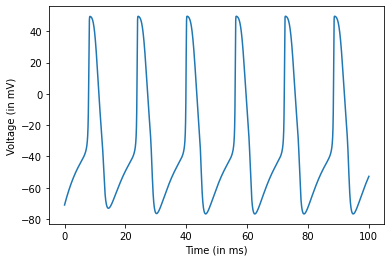

In [19]:
plt.plot(t,X[0,:])
plt.xlabel("Time (in ms)")
plt.ylabel("Voltage (in mV)")
plt.show()


# References

(<a id="cit-Dayan2005" href="#call-Dayan2005">Dayan and Abbott, 2005</a>) Peter Dayan and Larry F. Abbott, ``Theoretical Neuroscience - Computational and Mathematical Modeling of Neural Systems``,  2005.

(<a id="cit-Johnston1995" href="#call-Johnston1995">Johnston and Wu, 1995</a>) D. Johnston and S. M.S. Wu, ``Foundations of cellular neurophysiology``,  1995.

(<a id="cit-Huxley1952" href="#call-Huxley1952">Huxley and Hodgkin, 1952</a>) Huxley A. L. and Hodgkin A. F., ``Quantitative description of nerve current``, Journal of Physiology, vol. , number , pp. ,  1952.

(<a id="cit-gerstnerMOOC" href="#call-gerstnerMOOC">MOOC</a>) , ``Neuronal dynamics``,  .  [online](https://www.edx.org/course/neuronal-dynamics)

(<a id="cit-compneuroMOOC" href="#call-compneuroMOOC">MOOC</a>) , ``Computational Neuroscience``,  .  [online](https://www.coursera.org/learn/computational-neuroscience)

(<a id="cit-Gerstner2014" href="#call-Gerstner2014">Gerstner, Kistler <em>et al.</em>, 2014</a>) Wulfram Gerstner, Werner M. Kistler, Richard Naud <em>et al.</em>, ``Neuronal dynamics: From single neurons to networks and models of cognition``,  2014.

